In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import numpy as np
import matplotlib.pyplot as plt
import pickle
import json

import sys
sys.path.append("../../")

from src.context_aware.config import DatasetConfig
from src.dataset_manager import DatasetConvertor 
from src.context_aware.preprocessing import PreparingDataset

========== Combined ============
Backward: Compression rate: 0.3656
combined (104067,) (104067, 3) (104067,)
Name: combined, Ts:0.01, Data length:104067, Dim of context:3, Compression rate:0.3655913978494624


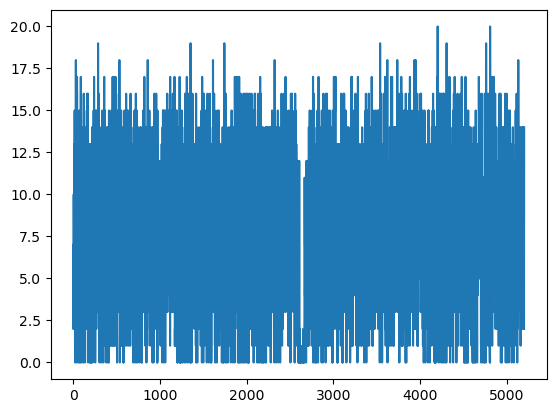

========== Combined ============
Forward: Compression rate: 0.2328
combined (104067,) (104067, 12) (104067,)
Name: combined, Ts:0.01, Data length:104067, Dim of context:12, Compression rate:0.23282116328903496


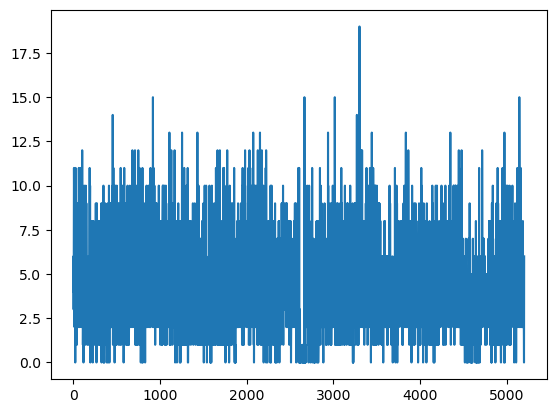

In [2]:
rawDatasetFolder = "../../data/raw"
dpdrDatasetFolder = "../../data/processed/dpdr"
configPath = "../config/conbined_flows.json"
lenWindow = 20

with open(configPath, "r") as f:
    config = json.load(f)

mapping = config.get("DIRECTION_MAPPING", {})
dpdr_params = config.get("dpdr_params", {})

for i, direction in enumerate(["backward", "forward"]):
    datasetConverter = DatasetConvertor(rawDatasetFolder, config)
    datasetConverter.processDataset(direction=direction, **dpdr_params[direction])
    thumbDataUnit = datasetConverter.getDataUnit(f"combined_{mapping[direction]}")
    thumbDataUnit.saveDataUnit(f"{dpdrDatasetFolder}/combined_{direction}.csv")

    thumbDataUnit.display()
    trffic = thumbDataUnit.generateTrafficPattern(lenWindow)
    plt.plot(trffic.flatten())
    plt.show()

In [3]:
thumbDataUnit.display()

Name: combined, Ts:0.01, Data length:104067, Dim of context:12, Compression rate:0.23282116328903496


(104067, 12)
(104067, 12)
(104067,)
12


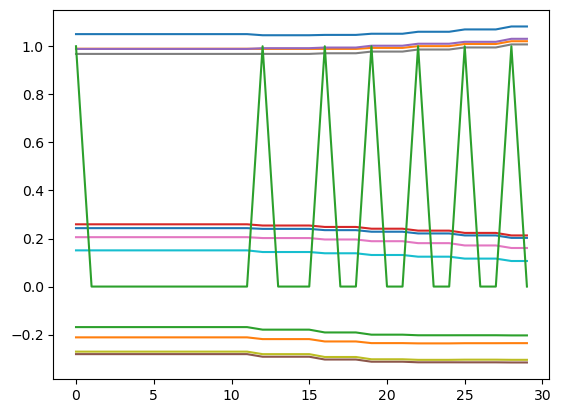

In [4]:
print(thumbDataUnit.contextData.shape)
print(thumbDataUnit.contextDataDpDr.shape)
print(thumbDataUnit.timestamps.shape)
print(thumbDataUnit.dimFeatures)
plt.plot(thumbDataUnit.contextDataDpDr[0:30])
plt.plot(thumbDataUnit.transmitionFlags[0:30])